In [10]:
numpy as np
import pandas as pd
from sklearn import svm

#visualize data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

In [11]:
teams = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
print(teams.head())

             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Villanova   BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2      Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3        Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4          Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  30.0  57.4  44.1  36.2  33.9   66.7   8.9   Champions   2.0  2016  
2  ...  26.0  52.9  46.5  37.4  36.9   65.5   2.3          E8   6.0  2016  
3  ...  33.4  52.6  46.3  40.3  34.7   61.9   8.6          E8   1.0  2016  
4  ...  37.3  52.7  43.4  41.3  32.5   70.1  11.6          E8   1.0  2016  

[5 rows x 24 columns]


C:\Users\avana\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


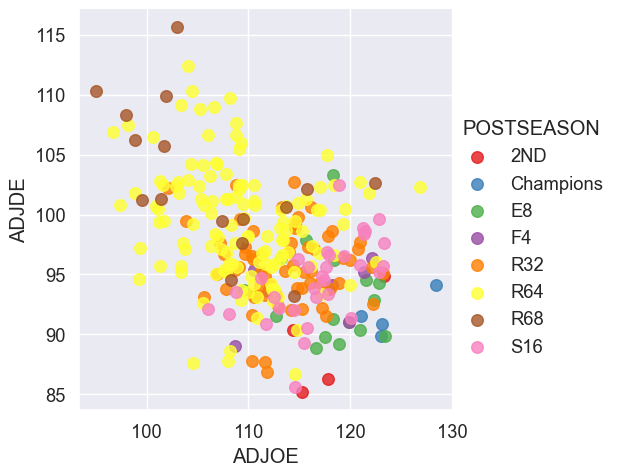

In [12]:
#plot data
sns.lmplot('ADJOE', 'ADJDE', data = teams, hue = 'POSTSEASON', palette='Set1', fit_reg=False, scatter_kws = {"s":70});

In [15]:
#format or preprocess data
result_label_champion = np.where(teams['POSTSEASON'] == 'Champions', 0, 1)
team_features = teams.columns.values[1:].tolist()
team_features
stats = teams[['ADJOE', 'ADJDE']].values
print(stats)

[[123.3  94.9]
 [123.1  90.9]
 [118.3 103.3]
 ...
 [108.1  91.7]
 [117.9  96.6]
 [122.8  95.2]]


In [16]:
model = svm.SVC(kernel = 'linear')
model.fit(stats, result_label_champion)

SVC(kernel='linear')

In [35]:
#get the seperating hyperplane
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(100,200)
yy = a*xx-(model.intercept_[0])/w[1]
#Plot the parallels to the separating hyperplane that pass through the supporting vectors 
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a*b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a*b[0])


C:\Users\avana\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


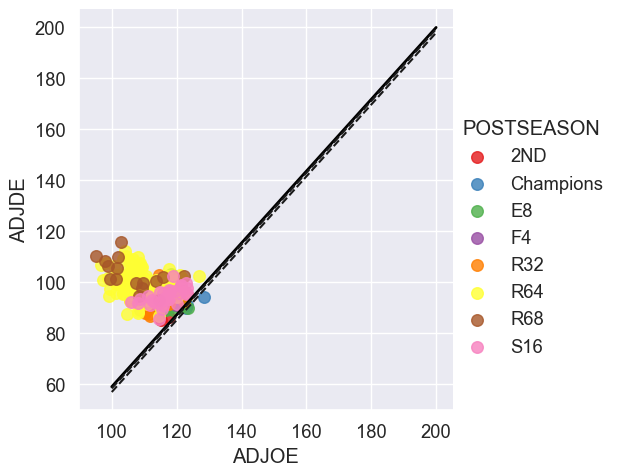

In [36]:
sns.lmplot('ADJOE', 'ADJDE', data = teams, hue = 'POSTSEASON', palette='Set1', fit_reg=False, scatter_kws = {"s":70});
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [34]:
def champion_or_notchampion(ADJOE,ADJDE):
    if (model.predict([[ADJOE, ADJDE]])) == 0:
        print("Champion!")
    else:
        print("Not champion...")
champion_or_notchampion(107, 200)

Not champion...
